# Salary Prediction

In [62]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [63]:
 df = pd.read_csv(r"C:\Users\USER\Downloads\Dataset salary 2024.csv")
 df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [40]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<Axes: xlabel='salary_in_usd', ylabel='Count'>

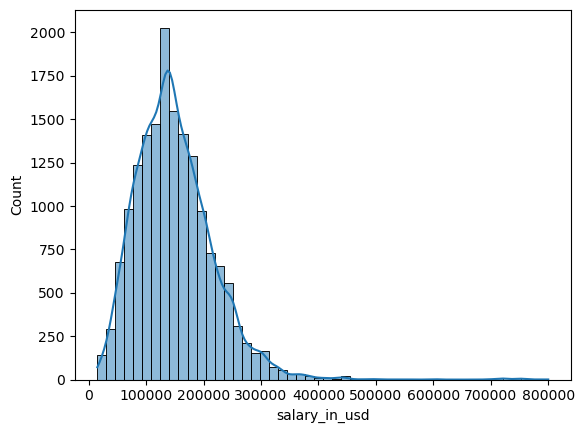

In [5]:
sns.histplot(df['salary_in_usd'], bins=50, kde=True)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

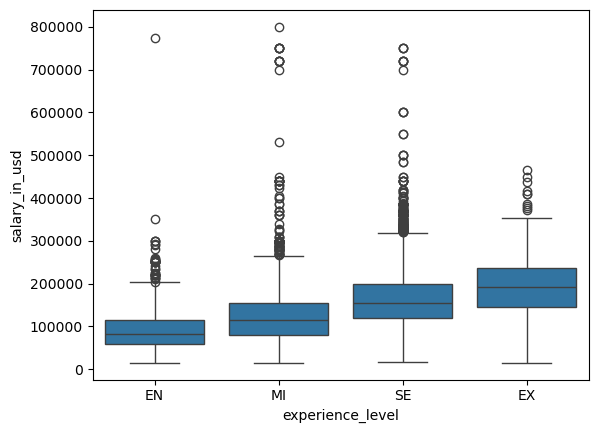

In [6]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN','MI','SE','EX'])

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

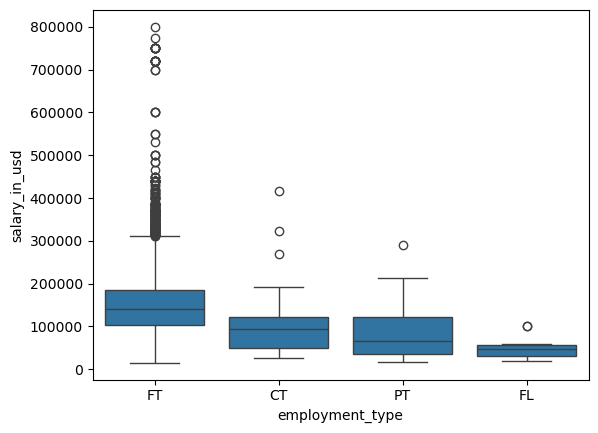

In [7]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)

In [8]:
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

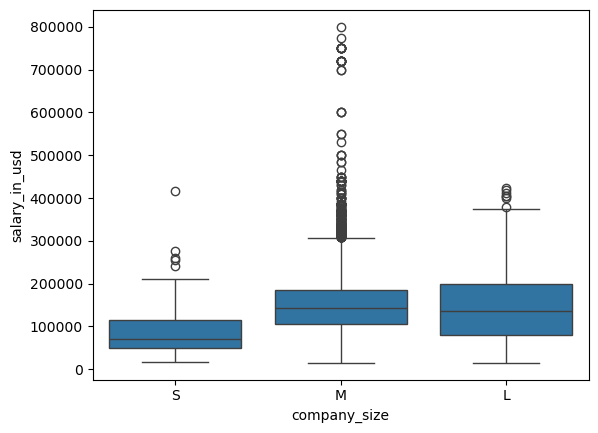

In [9]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=['S','M','L'])

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

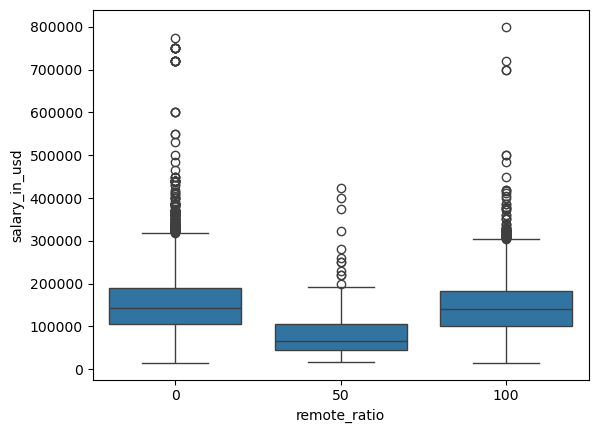

In [10]:
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)

<Axes: >

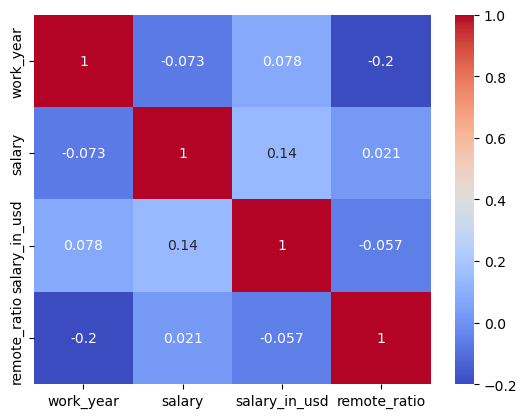

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

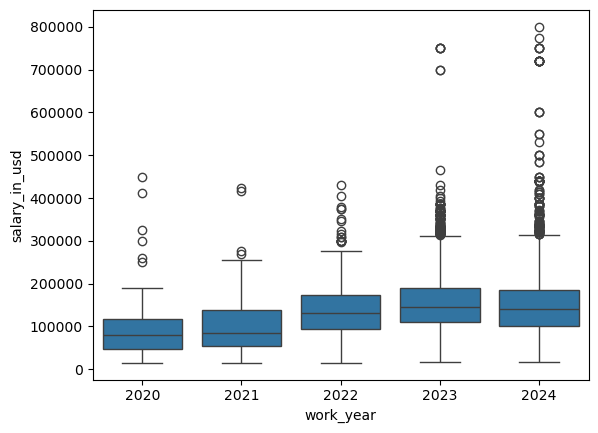

In [12]:
sns.boxplot(x='work_year', y='salary_in_usd', data=df)

In [64]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['experience_level', 'employment_type', 'job_title',
            'employee_residence', 'company_location', 'company_size', 'salary_currency']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [65]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,3,2,2,202730,21,202730,84,0,74,1
1,2024,3,2,2,92118,21,92118,84,0,74,1
2,2024,3,2,57,130500,21,130500,84,0,74,1
3,2024,3,2,57,96000,21,96000,84,0,74,1
4,2024,3,2,120,190000,21,190000,84,0,74,1


In [66]:
 ip = df.drop('salary_in_usd',axis=1)
 op = df.salary_in_usd

In [44]:
ip.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2024,3,2,2,202730,21,84,0,74,1
1,2024,3,2,2,92118,21,84,0,74,1
2,2024,3,2,57,130500,21,84,0,74,1
3,2024,3,2,57,96000,21,84,0,74,1
4,2024,3,2,120,190000,21,84,0,74,1


In [45]:
op.head()

0    202730
1     92118
2    130500
3     96000
4    190000
Name: salary_in_usd, dtype: int64

In [67]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2)

In [47]:
df.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

In [68]:
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 x_train = sc.fit_transform(x_train)
 x_test = sc.fit_transform(x_test)

In [69]:
 from sklearn.ensemble import RandomForestRegressor
 Rfg = RandomForestRegressor()
 Rfg.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
 ypred = Rfg.predict(x_test)

In [71]:
 from sklearn.metrics import r2_score,mean_squared_error
 r2 = r2_score(ypred,y_test)
 mse = mean_squared_error(ypred,y_test)
 print('R2 score is :',r2)
 print('Mean Squared Error is :',mse)

R2 score is : 0.9833938110850592
Mean Squared Error is : 74799211.20521681


In [72]:
 df = pd.DataFrame({'Prediction':ypred,'Actual data':y_test})
 df.head()

,Prediction,Actual data
11018,78999.00,81666
10665,134492.58,139400
10166,288424.00,300000
14691,25980.32,24165
12932,127616.88,132300


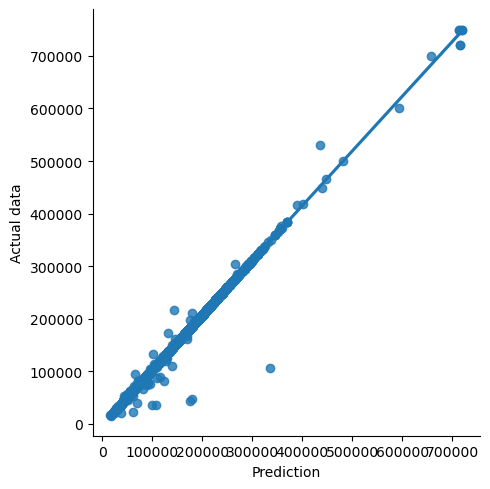

In [73]:
 sns.lmplot(df,x='Prediction',y='Actual data')
 plt.show()

In [74]:
rmse = np.sqrt(1160723294.3400087)
print(rmse)

34069.38940368625


In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=300, random_state=42)

In [76]:
y_pred_gb = gb.predict(x_test)

In [77]:
print("R²:", r2_score(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

R²: 0.9854371841736418
RMSE: 8460.449694055656


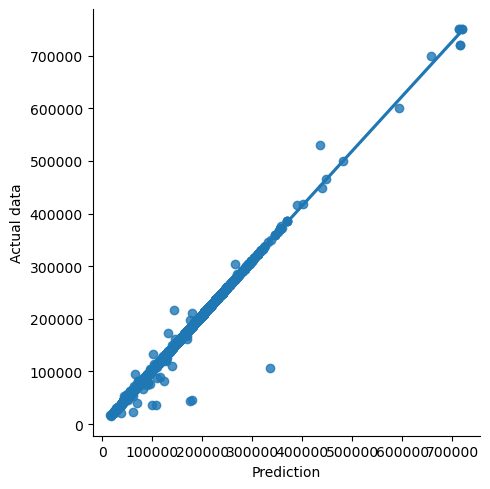

In [78]:
sns.lmplot(df,x='Prediction',y='Actual data')
plt.show()

In [97]:
import joblib

In [99]:
joblib.dump(gb,'salary_model.pkl')

['salary_model.pkl']

In [100]:
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']